Dataset Description:

In this project,the input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. 

There are two output variables(Next_Tmax,Next_Tmin) in this data.

Attribute information:

station - used weather station number
 
Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

Present_Tmax - Maximum air temperature

Present_Tmin - Minimum air temperature

LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity 

LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity

LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate

LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate

LDAPS_WS - LDAPS model forecast of next-day average wind speed

LDAPS_LH - LDAPS model forecast of next-day average latent heat flux 

LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover

LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover 

LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover 

LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover 

LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation 

LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation 

LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation 

LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation 

lat - Latitude

lon - Longitude 

DEM - Elevation

Slope 

Solar radiation - Daily incoming solar radiation

Next_Tmax - The next-day maximum air temperature 

Next_Tmin - The next-day minimum air temperature

In [454]:
#Importing the dataset

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [455]:
#Loading the dataset(Creating the dataframe)
df=pd.read_csv('temperature_prediction.csv')

In [456]:
pd.set_option('display.max_columns',None)

In [457]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [458]:
df.dtypes  #Checking the datatypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [459]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [460]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

Null values are present in the dataset

In [461]:
df.shape

(7752, 25)

Rows-->7752

columns-->25

In [462]:
#Dropping the 2 null values from two columns
df.dropna(subset=['station'],inplace=True)
df.dropna(subset=['Date'],inplace=True)

In [463]:
df.isnull().sum()


station              0
Date                 0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [464]:
df.shape

(7750, 25)

In [465]:
#EDA
#We have to convert Date into timestamp so as to use this column properly for prediction

df['Date_day']=pd.to_datetime(df.Date,format='%d-%m-%Y').dt.day
df['Date_month']=pd.to_datetime(df.Date,format='%d-%m-%Y').dt.month
df['Date_year']=pd.to_datetime(df.Date,format='%d-%m-%Y').dt.year

In [466]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_day,Date_month,Date_year
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


In [467]:
#Now dropping 'Duration' as it is of no use
df.drop(['Date'],axis=1,inplace=True)

In [468]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_day,Date_month,Date_year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


In [469]:
df.drop(['station'],axis=1,inplace=True)      #Dropping the station column as it is not playing a significant role

In [470]:
df.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_day,Date_month,Date_year
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30,6,2013
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30,6,2013
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30,6,2013
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30,6,2013
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30,6,2013


In [471]:
#Removing the null values from the columns
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='median')
df['Present_Tmax']=imp.fit_transform(df['Present_Tmax'].values.reshape(-1,1))
df['Present_Tmin']=imp.fit_transform(df['Present_Tmin'].values.reshape(-1,1))
df['LDAPS_RHmin']=imp.fit_transform(df['LDAPS_RHmin'].values.reshape(-1,1))
df['LDAPS_RHmax']=imp.fit_transform(df['LDAPS_RHmax'].values.reshape(-1,1))
df['LDAPS_Tmax_lapse']=imp.fit_transform(df['LDAPS_Tmax_lapse'].values.reshape(-1,1))
df['LDAPS_Tmin_lapse']=imp.fit_transform(df['LDAPS_Tmin_lapse'].values.reshape(-1,1))
df['LDAPS_WS']=imp.fit_transform(df['LDAPS_WS'].values.reshape(-1,1))
df['LDAPS_LH']=imp.fit_transform(df['LDAPS_LH'].values.reshape(-1,1))
df['LDAPS_CC1']=imp.fit_transform(df['LDAPS_CC1'].values.reshape(-1,1))
df['LDAPS_CC2']=imp.fit_transform(df['LDAPS_CC2'].values.reshape(-1,1))
df['LDAPS_CC3']=imp.fit_transform(df['LDAPS_CC3'].values.reshape(-1,1))
df['LDAPS_CC4']=imp.fit_transform(df['LDAPS_CC4'].values.reshape(-1,1))
df['LDAPS_PPT1']=imp.fit_transform(df['LDAPS_PPT1'].values.reshape(-1,1))
df['LDAPS_PPT2']=imp.fit_transform(df['LDAPS_PPT2'].values.reshape(-1,1))
df['LDAPS_PPT3']=imp.fit_transform(df['LDAPS_PPT3'].values.reshape(-1,1))
df['LDAPS_PPT4']=imp.fit_transform(df['LDAPS_PPT4'].values.reshape(-1,1))
df['Next_Tmax']=imp.fit_transform(df['Next_Tmax'].values.reshape(-1,1))
df['Next_Tmin']=imp.fit_transform(df['Next_Tmin'].values.reshape(-1,1))

In [472]:
df.isnull().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Date_day            0
Date_month          0
Date_year           0
dtype: int64

Null values are removed.

In [473]:
#We will make a single target column by taking the difference between two target variables
df['Next_Tmax - Next_Tmin'] = df['Next_Tmax'] - df['Next_Tmin']
print(df)

      Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0             28.7          21.4    58.255688    91.116364         28.074101   
1             31.9          21.6    52.263397    90.604721         29.850689   
2             31.6          23.3    48.690479    83.973587         30.091292   
3             32.0          23.4    58.239788    96.483688         29.704629   
4             31.4          21.9    56.174095    90.155128         29.113934   
...            ...           ...          ...          ...               ...   
7745          23.1          17.8    24.688997    78.261383         27.812697   
7746          22.5          17.4    30.094858    83.690018         26.704905   
7747          23.3          17.1    26.741310    78.869858         26.352081   
7748          23.3          17.7    24.040634    77.294975         27.010193   
7749          23.2          17.4    22.933014    77.243744         27.939516   

      LDAPS_Tmin_lapse  LDAPS_WS    LDA

In [474]:
#Dropping the two target variables 
df.drop(['Next_Tmax'],axis=1,inplace=True)
df.drop(['Next_Tmin'],axis=1,inplace=True)

In [475]:
df.shape

(7750, 25)

In [476]:
df.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Date_day,Date_month,Date_year,Next_Tmax - Next_Tmin
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,30,6,2013,7.9
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30,6,2013,8.0
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,30,6,2013,7.2
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,30,6,2013,7.4
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,30,6,2013,8.7


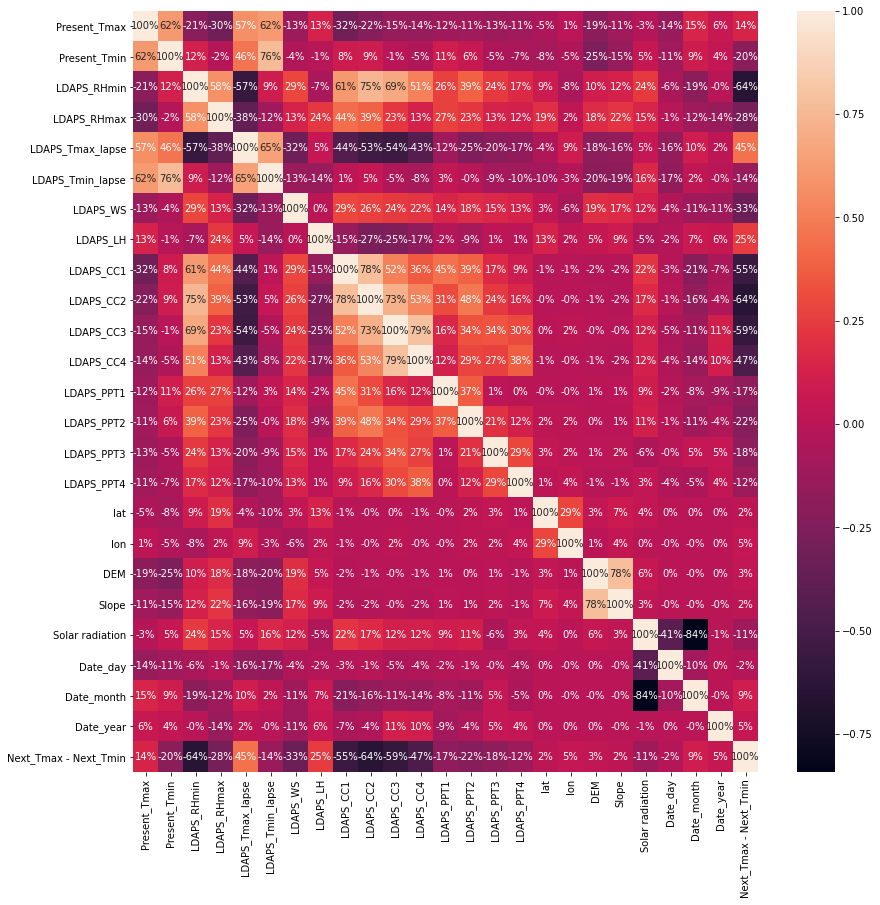

In [477]:
#Visualizing the correlation
plt.figure(figsize=(14,14))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

From the correlation matrix,we can see there are some columns which are positively correlated with our target variable

In [479]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Present_Tmax,7750.0,29.769652,2.953542,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7750.0,23.227316,2.398383,11.300000,21.700000,23.400000,24.875000,29.900000
LDAPS_RHmin,7750.0,56.742104,14.586073,19.794666,46.048225,55.039024,67.032715,98.524734
LDAPS_RHmax,7750.0,88.390831,7.150356,58.936283,84.318649,89.793480,93.703491,100.000153
LDAPS_Tmax_lapse,7750.0,29.614712,2.928370,17.624954,27.693733,29.703426,31.682567,38.542255
LDAPS_Tmin_lapse,7750.0,23.515389,2.331006,14.272646,22.115268,23.760199,25.133460,29.619342
LDAPS_WS,7750.0,7.091188,2.167185,2.882580,5.686498,6.547470,8.005363,21.857621
LDAPS_LH,7750.0,62.440791,33.520913,-13.603212,37.547426,56.865482,83.891182,213.414006
LDAPS_CC1,7750.0,0.368230,0.261148,0.000000,0.148339,0.315697,0.571665,0.967277
LDAPS_CC2,7750.0,0.355625,0.256752,0.000000,0.142424,0.312421,0.554910,0.968353


In [480]:
df.dtypes

Present_Tmax             float64
Present_Tmin             float64
LDAPS_RHmin              float64
LDAPS_RHmax              float64
LDAPS_Tmax_lapse         float64
LDAPS_Tmin_lapse         float64
LDAPS_WS                 float64
LDAPS_LH                 float64
LDAPS_CC1                float64
LDAPS_CC2                float64
LDAPS_CC3                float64
LDAPS_CC4                float64
LDAPS_PPT1               float64
LDAPS_PPT2               float64
LDAPS_PPT3               float64
LDAPS_PPT4               float64
lat                      float64
lon                      float64
DEM                      float64
Slope                    float64
Solar radiation          float64
Date_day                   int64
Date_month                 int64
Date_year                  int64
Next_Tmax - Next_Tmin    float64
dtype: object

In [483]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Date_day', 'Date_month', 'Date_year',
       'Next_Tmax - Next_Tmin'],
      dtype='object')

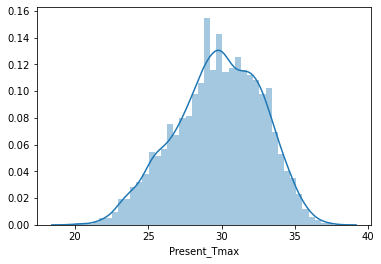

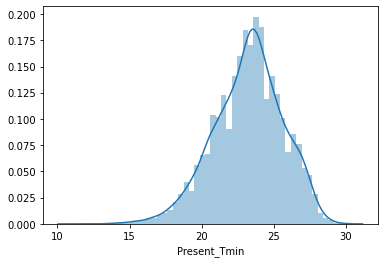

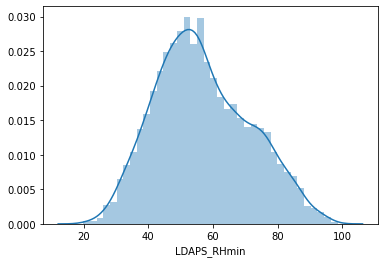

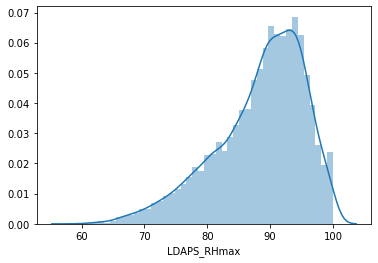

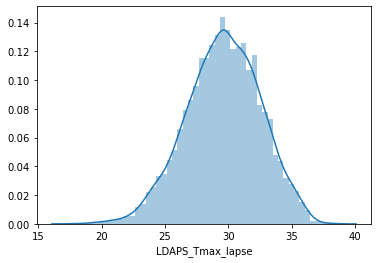

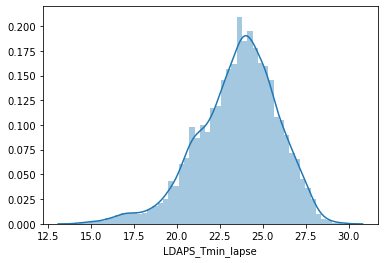

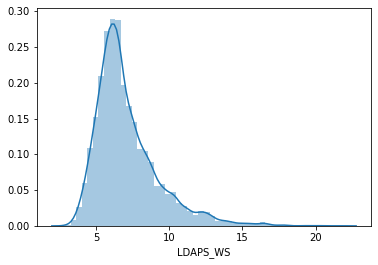

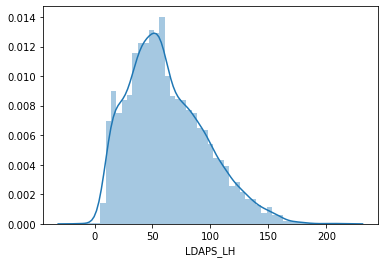

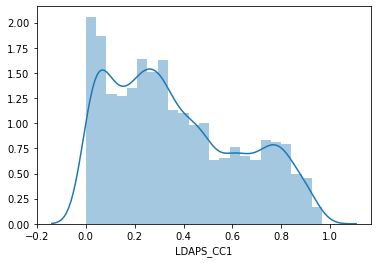

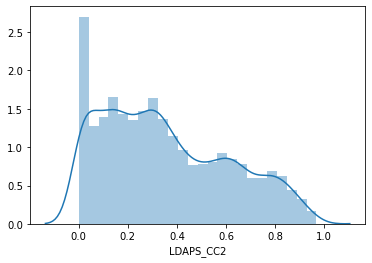

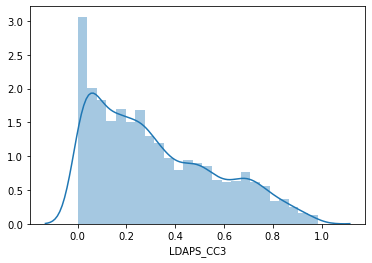

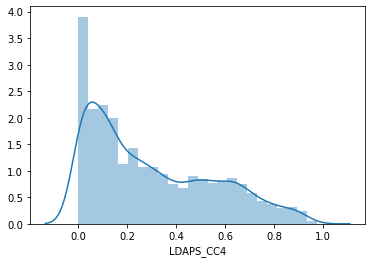

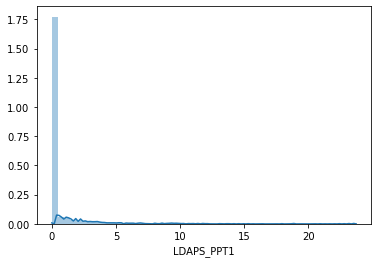

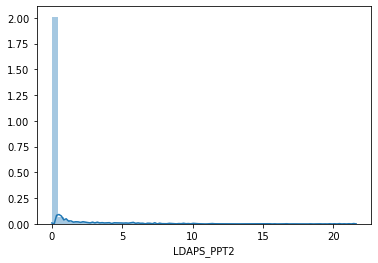

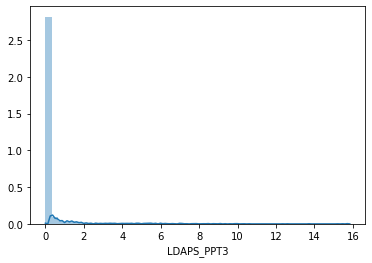

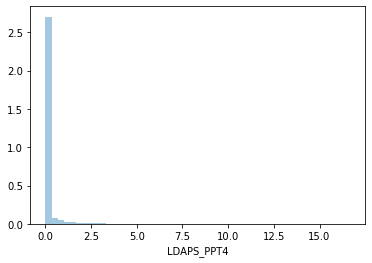

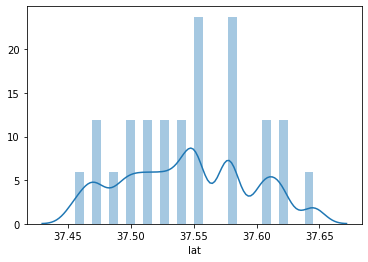

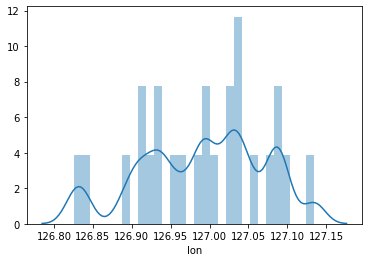

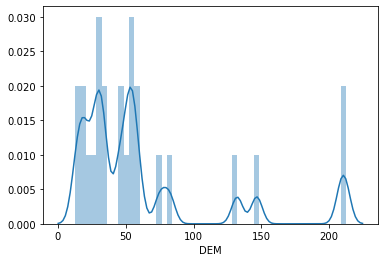

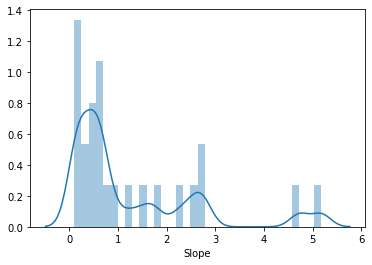

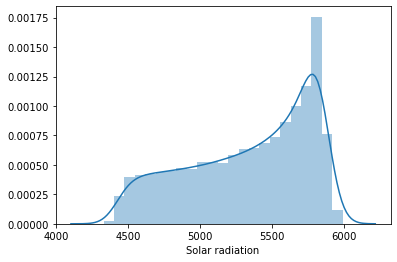

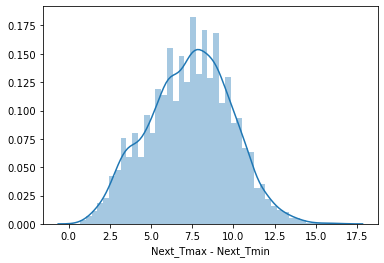

In [484]:
#Graphical representation of the float columns
columns=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation','Next_Tmax - Next_Tmin']
for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])

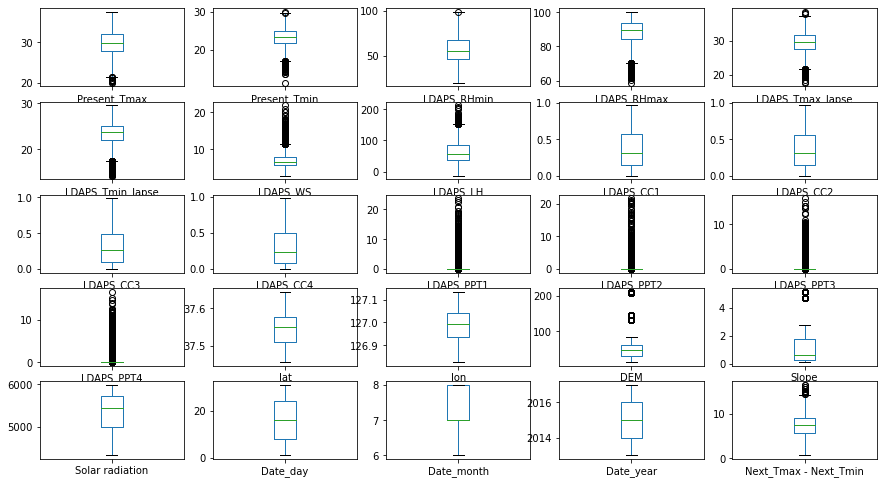

In [485]:
#Checking for outliers using boxplots
df.plot(kind='box',subplots=True,layout=(6,5),figsize=(15,10));

By looking at the boxplots,we can figure out that outliers are present.

We need to remove them using zscore method.

In [486]:
#Removing outliers using zscore
z=np.abs(zscore(df))
print(z)

[[0.36218226 0.76194411 0.10377578 ... 2.76776074 1.41421356 0.22234803]
 [0.72133242 0.67854922 0.30707346 ... 2.76776074 1.41421356 0.26225255]
 [0.61975292 0.03030732 0.55204333 ... 2.76776074 1.41421356 0.05698367]
 ...
 [2.19061328 2.55493417 2.05694359 ... 1.00369346 1.41421356 1.14015216]
 [2.19061328 2.30474951 2.24210996 ... 1.00369346 1.41421356 0.98053405]
 [2.22447311 2.42984184 2.31805169 ... 1.00369346 1.41421356 1.21996121]]


In [487]:
threshold=3
print(np.where(z<3))
print(df.shape)

(array([   0,    0,    0, ..., 7749, 7749, 7749], dtype=int64), array([ 0,  1,  2, ..., 22, 23, 24], dtype=int64))
(7750, 25)


In [488]:
#Assign the value to df_new which are less than threshold value and removing outliers
df_new=df[(z<3).all(axis=1)]

In [489]:
print(df.shape)
print(df_new.shape)
print('Shape after removing outliers:',df_new.shape)

(7750, 25)
(6894, 25)
Shape after removing outliers: (6894, 25)


In [490]:
#%data loss calculation
loss_percent=(7750-6894)/7750*100
print(loss_percent)

11.04516129032258


11% data loss is not acceptable ,so we will not remove the outliers and will proceed along with the outliers.

In [491]:
#Checking the skewness in data
df.skew()

Present_Tmax            -0.264215
Present_Tmin            -0.359513
LDAPS_RHmin              0.303578
LDAPS_RHmax             -0.855863
LDAPS_Tmax_lapse        -0.225096
LDAPS_Tmin_lapse        -0.582013
LDAPS_WS                 1.562204
LDAPS_LH                 0.672151
LDAPS_CC1                0.464742
LDAPS_CC2                0.476659
LDAPS_CC3                0.646029
LDAPS_CC4                0.673054
LDAPS_PPT1               5.325873
LDAPS_PPT2               5.714821
LDAPS_PPT3               6.370279
LDAPS_PPT4               6.744793
lat                      0.086942
lon                     -0.285300
DEM                      1.723944
Slope                    1.563346
Solar radiation         -0.511006
Date_day                -0.008925
Date_month              -0.195864
Date_year                0.000000
Next_Tmax - Next_Tmin   -0.035743
dtype: float64

In [508]:
#Splitting the independent and target variable in x and y 
x=df.drop(['Next_Tmax - Next_Tmin'],axis=1)
y=df['Next_Tmax - Next_Tmin']

In [509]:
x

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Date_day,Date_month,Date_year
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,1.616969e-01,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,30,6,2013
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,1.594441e-01,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30,6,2013
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,2.040915e-01,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,30,6,2013
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,1.611574e-01,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,30,6,2013
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,1.788925e-01,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,30,6,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,0.000000e+00,0.004380,0.0,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,30,8,2017
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,5.850000e-07,0.017678,0.0,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,30,8,2017
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,30,8,2017
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,30,8,2017


In [510]:
y

0        7.9
1        8.0
2        7.2
3        7.4
4        8.7
        ... 
7745     9.9
7746    10.9
7747    10.2
7748     9.8
7749    10.4
Name: Next_Tmax - Next_Tmin, Length: 7750, dtype: float64

In [511]:
#Removing skewness using power transform method
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new,columns=x.columns)

In [512]:
df_new.skew()

Present_Tmax       -0.035635
Present_Tmin       -0.013928
LDAPS_RHmin        -0.017327
LDAPS_RHmax        -0.116480
LDAPS_Tmax_lapse   -0.010548
LDAPS_Tmin_lapse   -0.019053
LDAPS_WS            0.004202
LDAPS_LH            0.031208
LDAPS_CC1           0.048097
LDAPS_CC2           0.046374
LDAPS_CC3           0.089606
LDAPS_CC4           0.129753
LDAPS_PPT1          1.463967
LDAPS_PPT2          1.646387
LDAPS_PPT3          1.824595
LDAPS_PPT4          2.059402
lat                 0.070111
lon                -0.198533
DEM                 0.039436
Slope               0.233914
Solar radiation    -0.176686
Date_day           -0.216511
Date_month         -0.092335
Date_year          -0.000215
dtype: float64

In [513]:
x=df_new
x

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Date_day,Date_month,Date_year
0,-0.409911,-0.799426,0.174949,0.269931,-0.557633,-0.314397,0.098335,0.320585,-0.408864,-0.503983,-0.538510,-0.580480,-0.557329,-0.519106,-0.492319,-0.444374,1.188579,-0.027662,1.835459,1.314447,1.850167,1.463124,-2.419182,-1.414316
1,0.705327,-0.721704,-0.239869,0.182702,0.043643,0.142943,-0.622949,-0.201783,-0.448028,-0.280803,-0.550985,-0.599355,-0.557329,-0.519106,-0.492319,-0.444374,1.188579,0.497443,0.056032,-0.385353,1.401217,1.463124,-2.419182,-1.414316
2,0.595752,-0.028129,-0.499986,-0.777025,0.127215,0.393555,-0.311020,-1.387402,-0.524327,-0.255194,-0.313567,-0.515519,-0.557329,-0.519106,-0.492319,-0.444374,0.656862,0.836831,-0.364677,-0.949335,1.381155,1.463124,-2.419182,-1.414316
3,0.742083,0.014515,0.173880,1.316625,-0.006842,-0.176306,-0.654258,0.214714,-0.490942,-0.399110,-0.541492,-0.561044,-0.557329,-0.519106,-0.492319,-0.444374,1.979398,0.368238,0.084942,1.235549,1.358278,1.463124,-2.419182,-1.414316
4,0.523280,-0.603596,0.033682,0.107726,-0.209095,-0.105642,-0.591078,1.299383,-0.812526,-0.288826,-0.445066,-0.360578,-0.557329,-0.519106,-0.492319,-0.444374,0.124557,1.871848,-0.290515,-0.401751,1.367247,1.463124,-2.419182,-1.414316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,-2.078126,-2.060957,-2.619794,-1.386097,-0.643741,-1.968868,-0.023692,-1.979918,-1.363078,-1.457366,-1.597486,-1.446957,-0.557329,-0.519106,-0.492319,-0.444374,0.124557,0.601337,-0.721794,-0.279523,-1.739436,1.463124,1.014086,1.414111
7746,-2.235555,-2.185240,-2.066717,-0.811603,-1.001874,-2.103051,-0.566891,0.664336,-1.282231,-1.492895,-1.597482,-1.342800,-0.557329,-0.519106,-0.492319,-0.444374,-0.682713,1.207974,-1.006373,-1.355104,-1.756893,1.463124,1.014086,1.414111
7747,-2.024736,-2.276394,-2.402655,-1.329445,-1.113623,-1.832817,-0.304008,0.393230,-1.503482,-1.151653,-1.597486,-1.482044,-0.557329,-0.519106,-0.492319,-0.444374,-0.143946,-1.258231,-1.578769,-1.280717,-1.755049,1.463124,1.014086,1.414111
7748,-2.024736,-2.092322,-2.690436,-1.472390,-0.904277,-1.845209,-0.059099,-0.354178,-1.467132,-1.186871,-1.597486,-1.482044,-0.557329,-0.519106,-0.492319,-0.444374,-0.413036,-1.041861,-1.401188,-1.073155,-1.761072,1.463124,1.014086,1.414111


Skewness has been removed.

In [514]:
#Using StandardScaler to scale the data 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [515]:
#Model Building

model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor(),RandomForestRegressor()]
max_r2_score=0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre=i.predict(test_x)
        r2_sc=r2_score(test_y,pre)
        print('r2 score correspond to random state',r_state,'is',r2_sc)
        if r2_sc>max_r2_score:
            max_r2_score=r2_sc
            final_state=r_state
            final_model=i
print()
print()
print()
print()
print('max r2 score correspond to random state',final_state,'is',max_r2_score,'and model is',final_model)

r2 score correspond to random state 40 is 0.66794085504437
r2 score correspond to random state 40 is 0.8179868743941748
r2 score correspond to random state 40 is 0.6173930087439067
r2 score correspond to random state 40 is 0.6463377289037033
r2 score correspond to random state 40 is 0.7597198730012342
r2 score correspond to random state 40 is 0.8530457267903975
r2 score correspond to random state 41 is 0.6675383297207128
r2 score correspond to random state 41 is 0.8299440507083956
r2 score correspond to random state 41 is 0.6273661403752013
r2 score correspond to random state 41 is 0.6452357499876984
r2 score correspond to random state 41 is 0.7617303600724354
r2 score correspond to random state 41 is 0.8604758427231631
r2 score correspond to random state 42 is 0.6145581971700291
r2 score correspond to random state 42 is 0.821198293334236
r2 score correspond to random state 42 is 0.6295101662006444
r2 score correspond to random state 42 is 0.6400064824366782
r2 score correspond to rand

Above I am using for loop which helps me to provide the r2 score at each random state and for the best state where r2 score is maximum has come as output value.

The best model is Random Forest Regressor and the r2 score is 86% to random state 60.

In [516]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=60,test_size=0.33)

In [517]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(train_x,train_y)

RandomForestRegressor()

In [518]:
y_pred=rf.predict(test_x)

In [519]:
rf.score(train_x,train_y)

0.9783161353992089

In [520]:
rf.score(test_x,test_y)

0.862566046132488

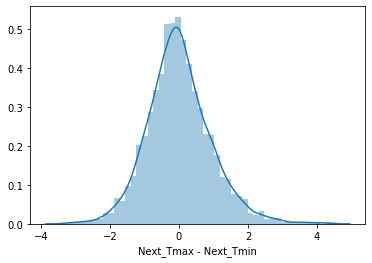

In [521]:
sns.distplot(test_y-y_pred)
plt.show()

From the distribution plot,it is seen that,there is normal distribution,means the model is performing well

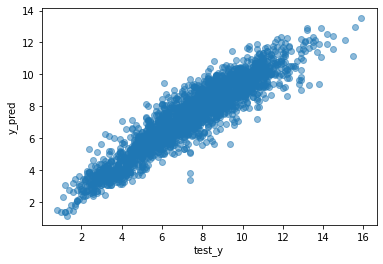

In [524]:
#Scatterplot to show the actual and the predicted graph
plt.scatter(test_y, y_pred, alpha = 0.5)
plt.xlabel("test_y")
plt.ylabel("y_pred")
plt.show()

In [523]:
from sklearn.metrics import mean_absolute_error
print('Mean Absolute Error:',mean_absolute_error(test_y,y_pred))
print('Mean Squared Error:',mean_squared_error(test_y,y_pred))
print('Root Mean Absolute Error:',np.sqrt(mean_absolute_error(test_y,y_pred)))

Mean Absolute Error: 0.7044053948397185
Mean Squared Error: 0.8661046219702893
Root Mean Absolute Error: 0.8392886242763681


Hyperparameter tuning using RandomizedSearchCV

In [525]:
from sklearn.model_selection import RandomizedSearchCV

In [526]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [527]:
#Creating random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [528]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=60, n_jobs = 1)

In [529]:
rf_random.fit(train_x,train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=  30.2s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.1s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=  27.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=  24.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=  28.9s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=  32.1s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=15 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=15, total=   7.5s
[CV] n_estimators=300, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 37.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=60, scoring='neg_mean_squared_error',
                   verbose=2)

In [530]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [531]:
rf=RandomForestRegressor(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25)
rf.fit(train_x,train_y)
rf.score(train_x,train_y)
pred=rf.predict(test_x)
rfs=r2_score(test_y,pred)
print('R2 score:',rfs*100)

R2 score: 86.47821540236873


In [532]:
from sklearn.model_selection import cross_val_score
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 48.908630535914355


The accuracy of the model after hyperparameter tuning using RandomizedSearchCV is 86% and the cross validation score of the model is 50%.

After hyperparameter tuning the model's accuracy is increased by 36%.

In [533]:
prediction = rf_random.predict(test_x)

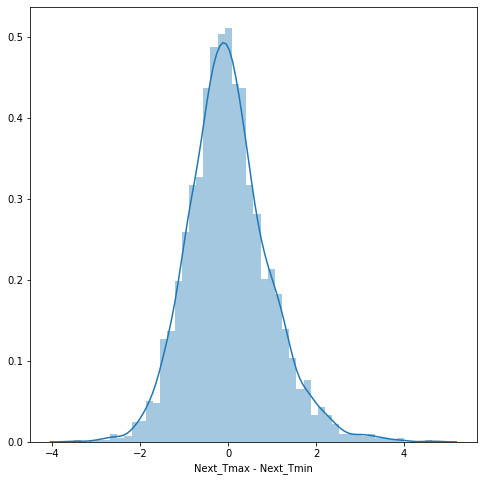

In [537]:
#Distributionplot
plt.figure(figsize = (8,8))
sns.distplot(test_y-prediction)
plt.show()

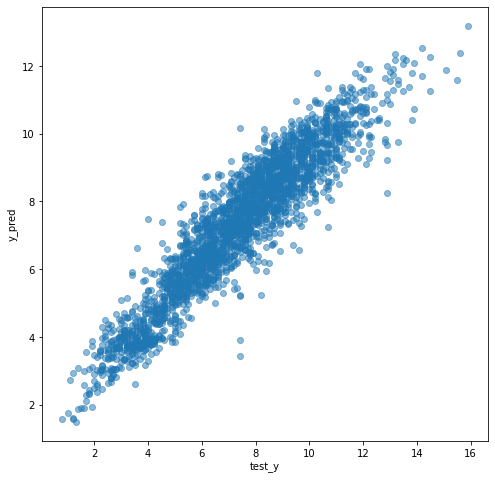

In [538]:
#Scatterplot
plt.figure(figsize = (8,8))
plt.scatter(test_y, prediction, alpha = 0.5)
plt.xlabel("test_y")
plt.ylabel("y_pred")
plt.show()

In [536]:
#Saving the model
import pickle
filename='temperature_prediction.pkl'
pickle.dump(rf,open(filename,'wb'))